# Automatic Baseline Correction Using arPLS

## Lightnovo ApS

### info@lightnovo.com

Copyright 2024 Lightnovo ApS

Licensing: MIT license

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os

import pybaselines

import datetime

In [2]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

In [3]:
plt.rcParams.update({'figure.max_open_warning': 0})

In [4]:
#Raman spectrum class
class raman_spectrum:
    def __init__(self,fname):
        self.fname = fname
        self.fname0 = self.fname.split('/')[-1]
        self.df = pd.read_csv(fname + '.tsv', sep='\t', header =7)
        self.df.rename(columns={'Tags':'Raman Shift, cm-1', self.df.columns[1]:'Intensity, %'}, inplace = True)
        self.df.replace([np.inf, -np.inf], np.nan, inplace=True)
        self.df.dropna(inplace = True)
        self.baseline()
        self.normalize()
        
    
  
    def baseline(self):
        pass
        self.df["Baseline, %"] = pybaselines.whittaker.arpls(self.df["Intensity, %"])[0]
        self.df["Baseline Corrected, %"] = self.df["Intensity, %"] - self.df["Baseline, %"] 
        
    def normalize(self):
        self.df["Normalized Intensity"] = (self.df["Intensity, %"] - ( min0:=self.df["Intensity, %"].min()) )/(self.df["Intensity, %"].max() - min0) 
        self.df["Normalized Baseline Corrected"] = (self.df["Baseline Corrected, %"] - ( min0:=self.df["Baseline Corrected, %"].min()) )/(self.df["Baseline Corrected, %"].max() - min0) 
    
    def plot(self, color, label):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Intensity, %", color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 
    
    def plot(self, color, label):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Intensity, %", color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 
  
    def plot_baseline(self, color, label):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Baseline, %", color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 
        
    def plot_baseline_corrected(self, color, label):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Baseline Corrected, %", color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 
        
    def plot_n(self, color, label, marker = None):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Normalized Intensity", marker = marker, color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 

In [5]:
tic = datetime.datetime.now()

In [6]:
dir_path = "Data"

In [7]:
notebook_dir = os.getcwd()
os.chdir(dir_path)
files = os.listdir()
files.sort(key=lambda x: os.path.getmtime(x))

In [8]:
print(files)

['acetonitrile.tsv', 'calcite.tsv', 'diamond.tsv', 'ethanol.tsv', 'isopropanol.tsv', 'methanol.tsv', 'paracetamol.tsv', 'polystyrene.tsv', 'silicon.tsv']


In [9]:
files = [f.split('.')[0] for f in files]

In [10]:
print(files)

['acetonitrile', 'calcite', 'diamond', 'ethanol', 'isopropanol', 'methanol', 'paracetamol', 'polystyrene', 'silicon']


In [11]:
spectra = []

for f in files:
    spectra.append(raman_spectrum(f))

In [12]:
os.chdir(notebook_dir)

In [13]:
cc = ['gray','blue','green','orange','red','gold', 'purple', 'cyan','lime']

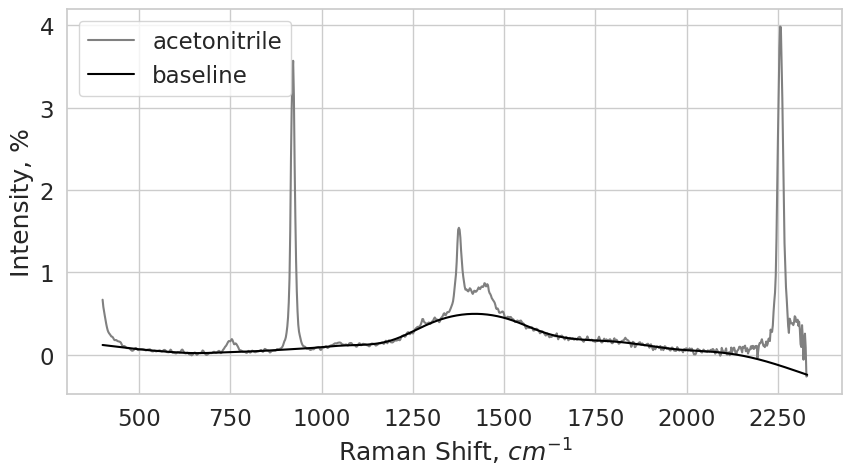

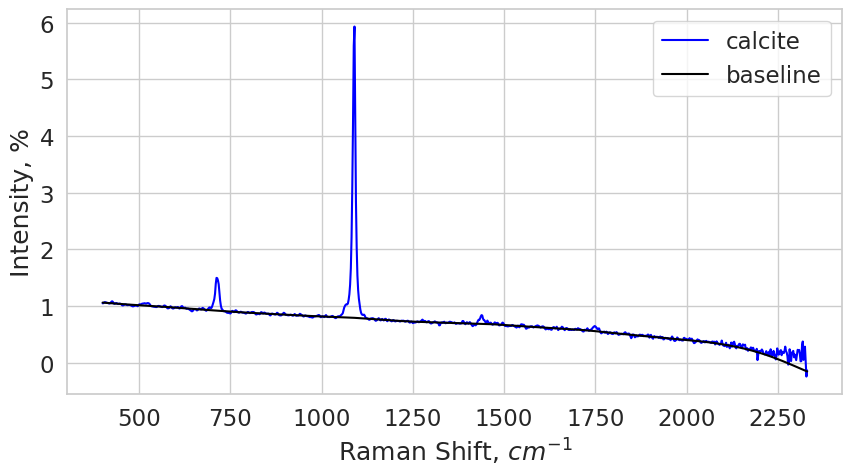

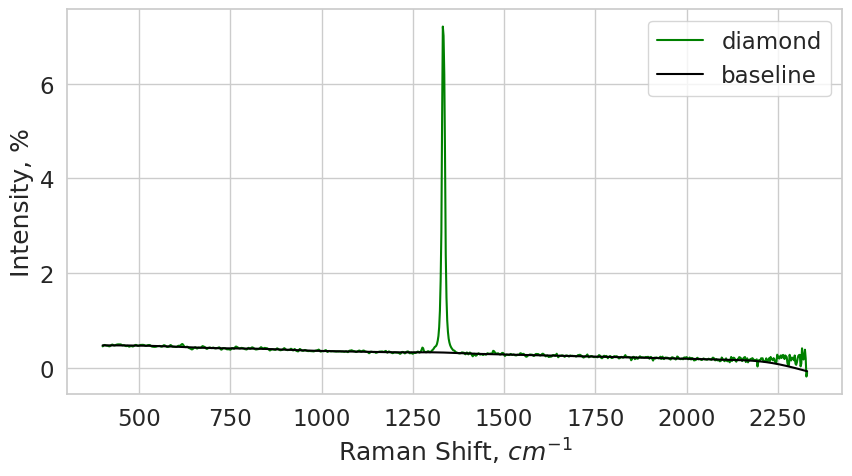

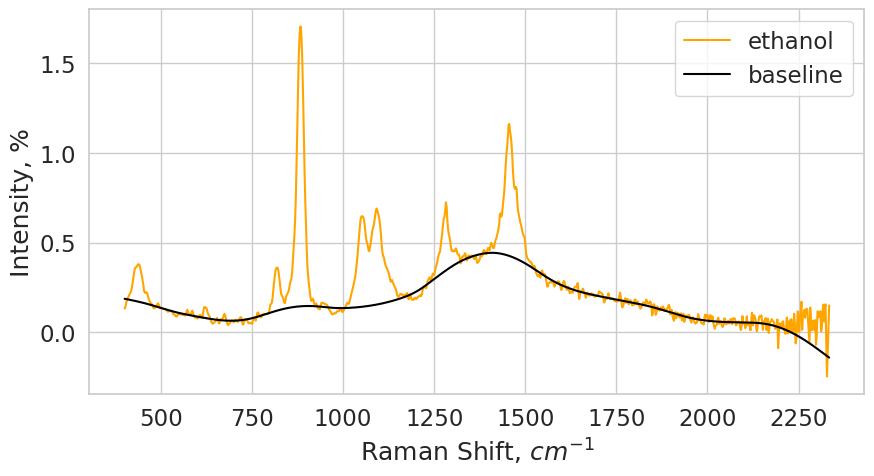

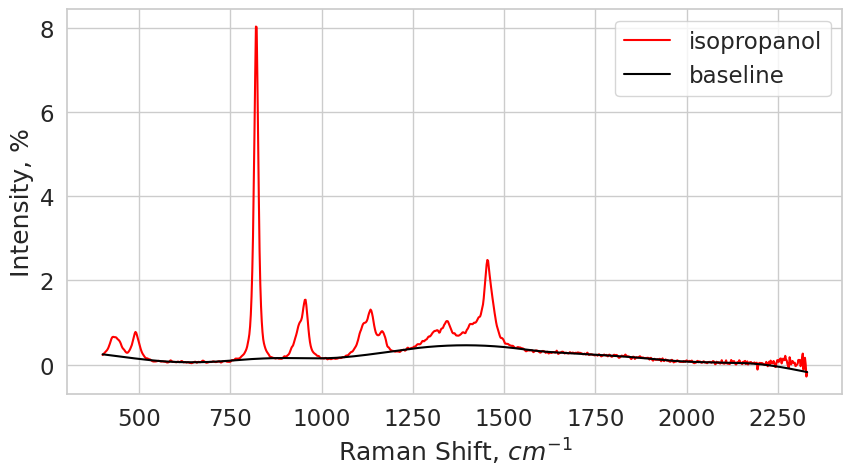

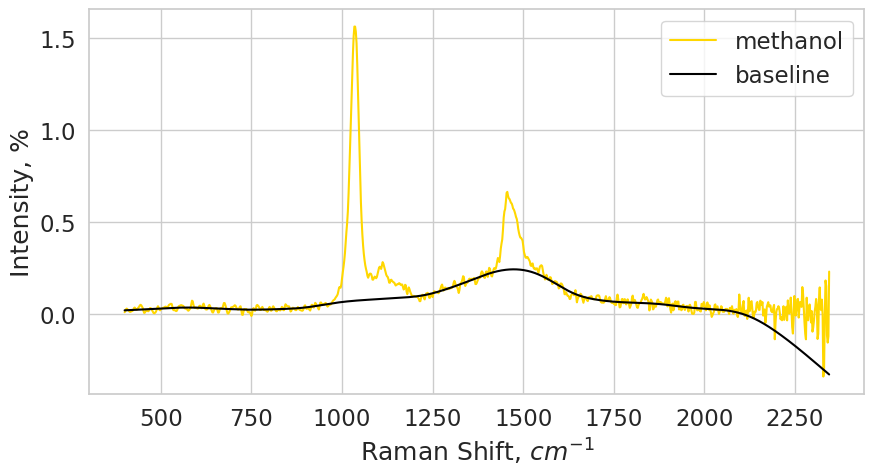

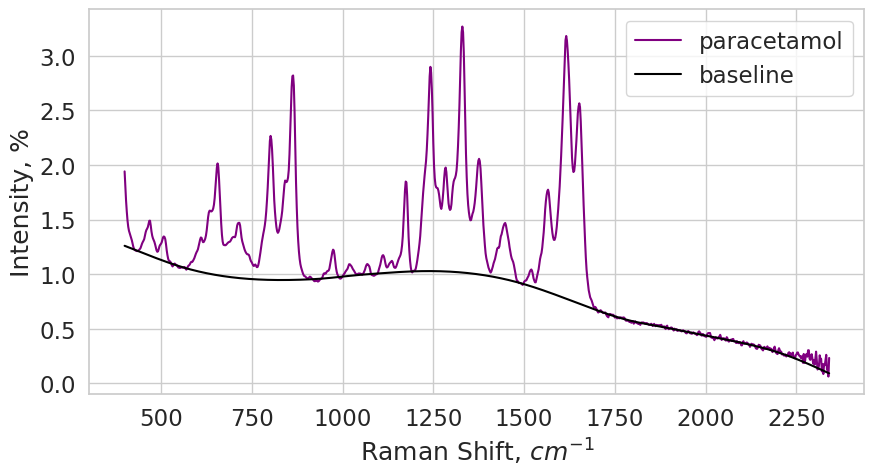

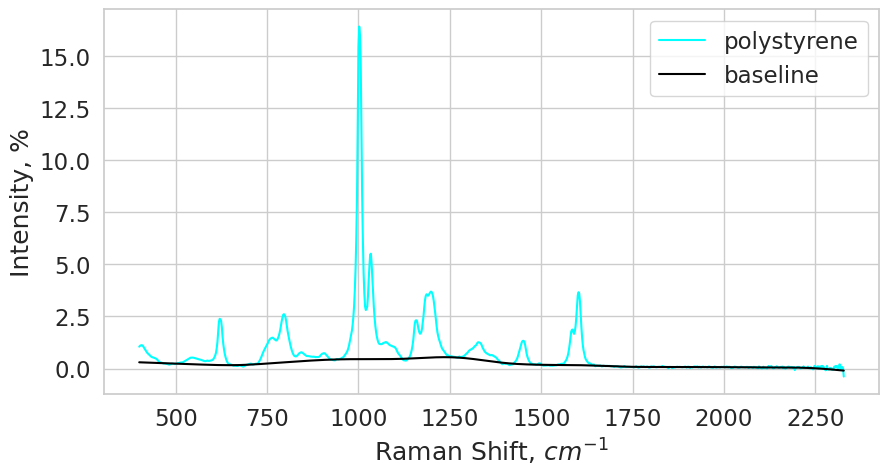

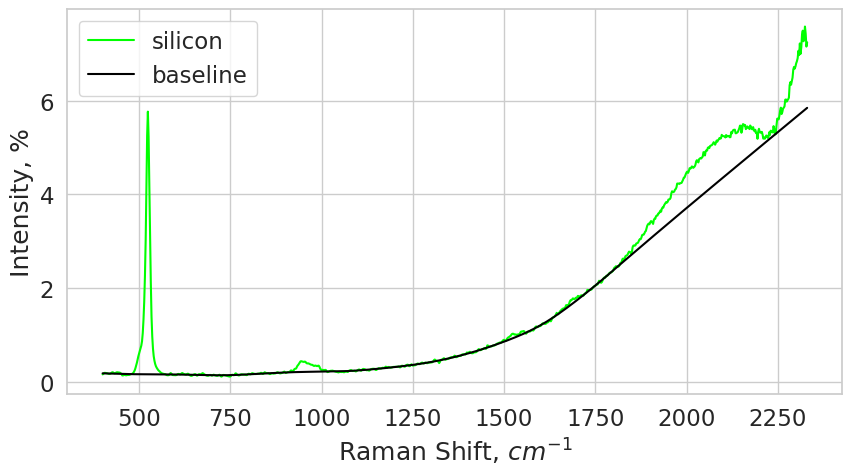

In [14]:
for s,c in zip(spectra,cc):
    plt.figure(figsize = (10,5))
    s.plot(color = c, label = s.fname0)
    s.plot_baseline(color = "black", label = 'baseline')
    plt.savefig(s.fname0 + '.png', dpi = 300, bbox_inches='tight')

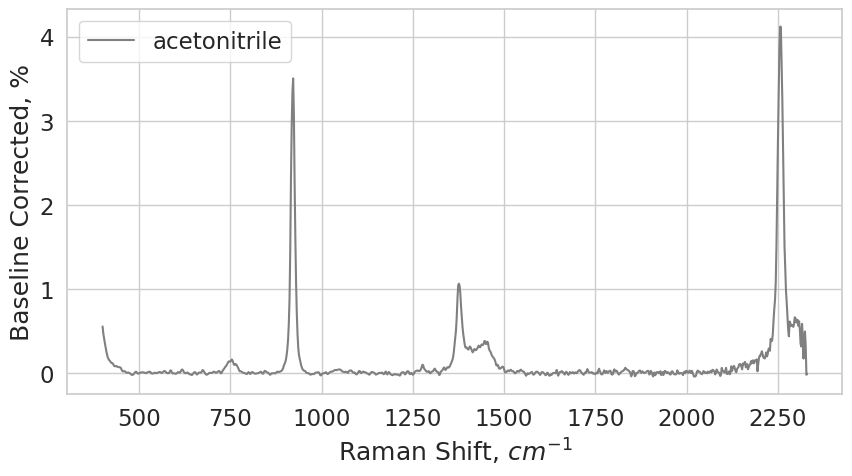

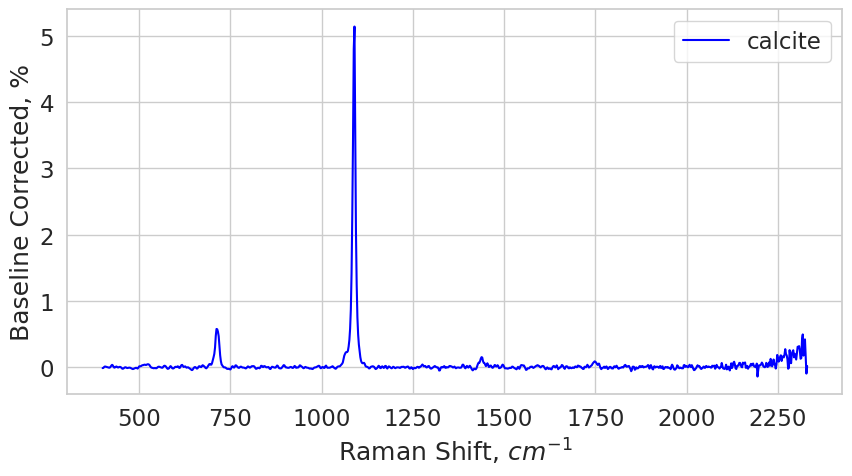

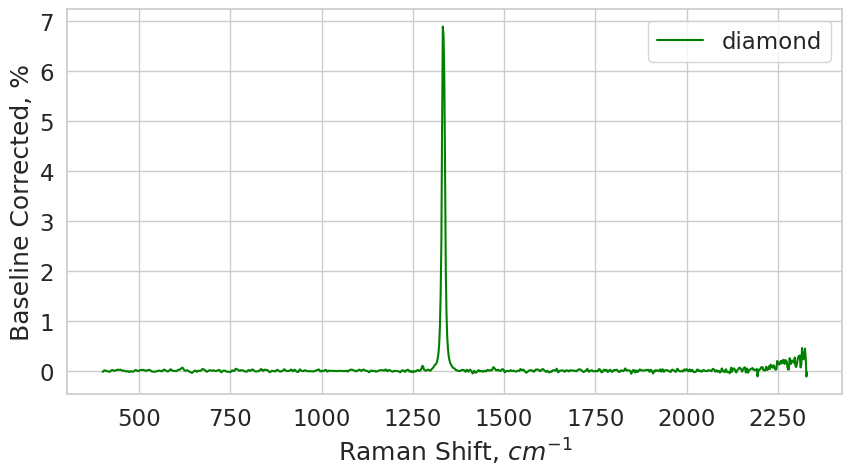

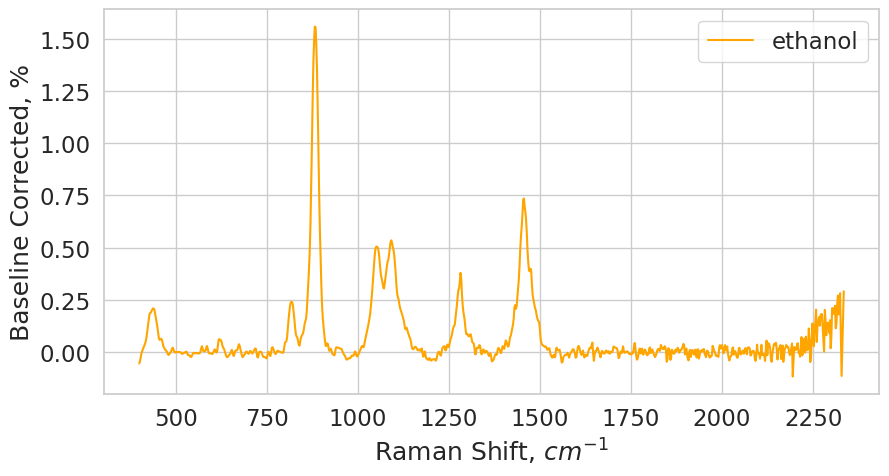

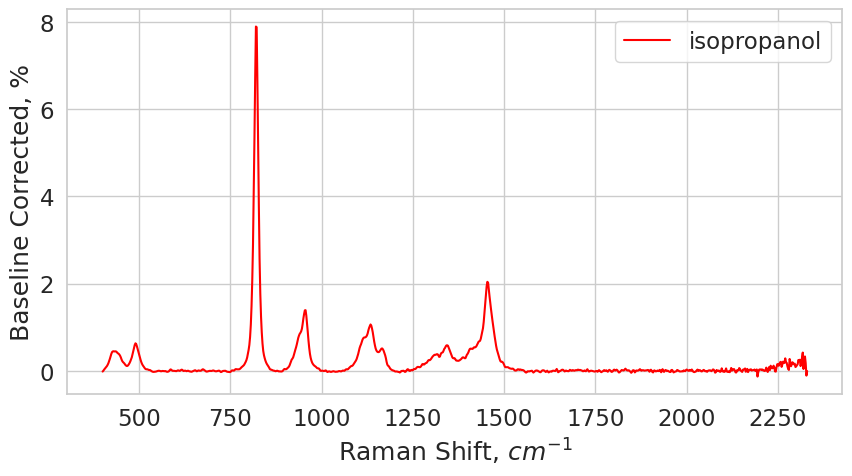

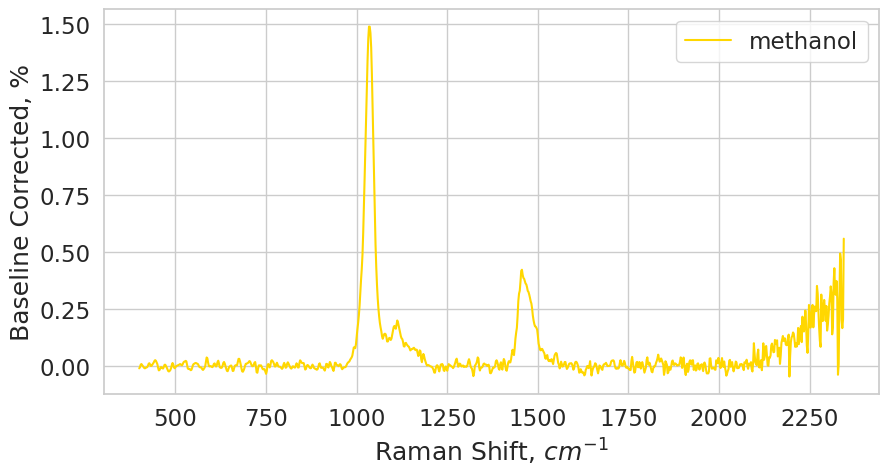

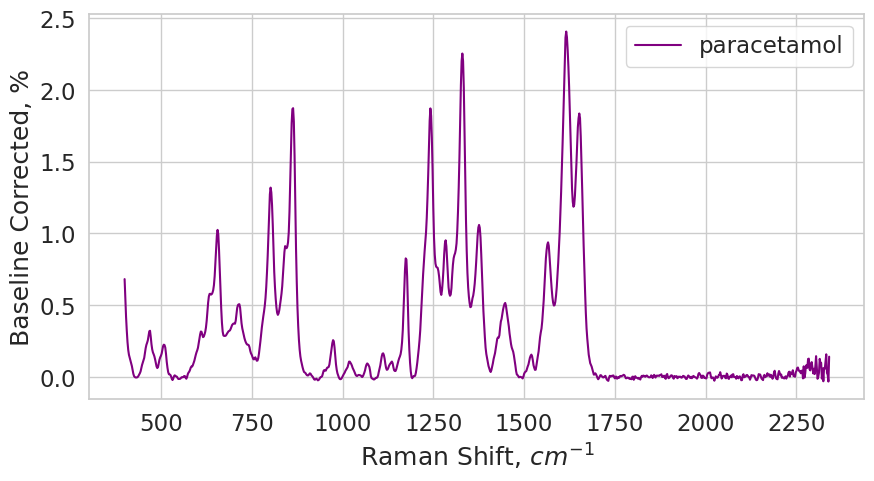

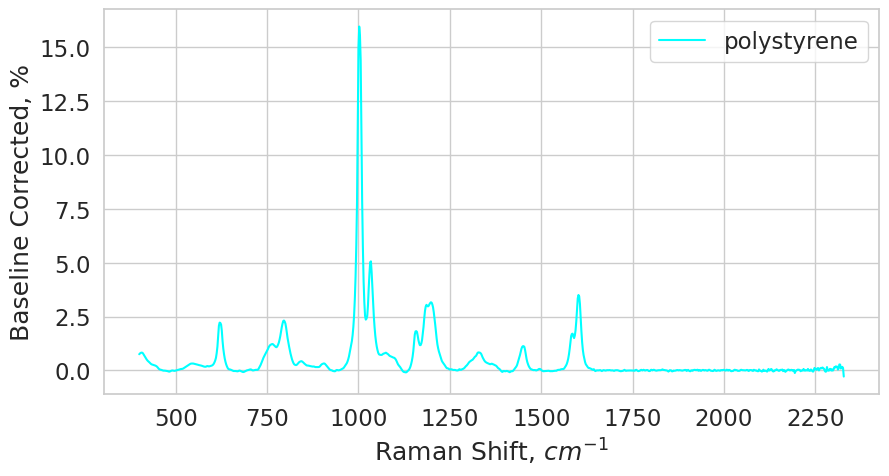

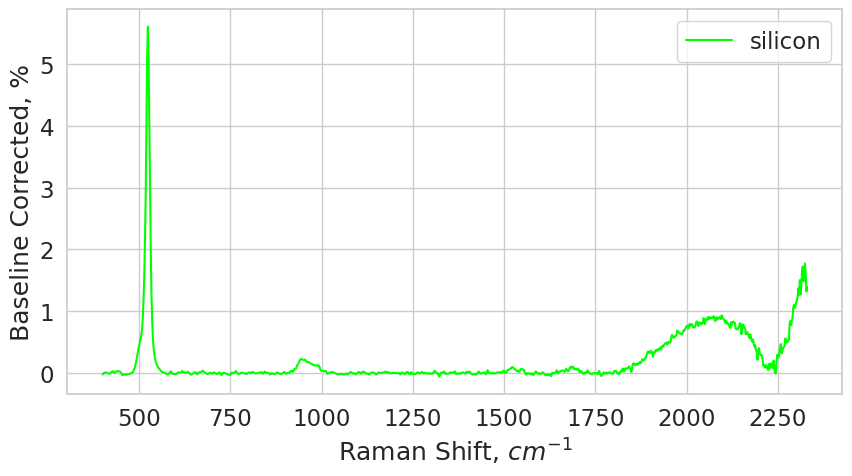

In [15]:
for s,c in zip(spectra,cc):
    plt.figure(figsize = (10,5))
    s.plot_baseline_corrected(color = c, label = s.fname0)
    plt.savefig(s.fname0 + '_bl_corrected.png', dpi = 300, bbox_inches='tight')

In [16]:
toc = datetime.datetime.now()
print(toc-tic)

0:00:24.668258
